# Análisis Exploratorio de Datos

El análisis exploratorio de datos es el primer paso para resolver cualquier problema de ciencia de datos o Machine Learning. Se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos que tenemos disponibles y familiarizarse con ellos. EDA realiza un examen exhaustivo de nuestro conjunto de datos para encontrar tendencias, patrones y relaciones entre las características dentro de los datos con la ayuda de gráficos y diagramas utilizando bibliotecas como Matplotlib y Seaborn. También usaremos la biblioteca Pandas; esta facilita mucho la importación, el análisis y la visualización.

En esta sección, utilizaremos el conjunto de datos Titanic, un conjunto de datos introductorio popular, para aprender el proceso de análisis de datos exploratorio paso a paso. El propósito es llevar al lector a la posición de continuar con sus propias ideas y, al final de este curso, buscar un conjunto de datos con un tema de su propio interés para explorar.

### Entendiendo el enunciado del problema

Antes de comenzar a resolver el problema, debemos asegurarnos de que entendemos muy bien el enunciado del problema.

Definición del problema:

El hundimiento del Titanic resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes. Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros. Aparentemente hubo algunos patrones en las personas que murieron y las personas que sobrevivieron. El problema aquí es que nos dan ciertos datos con características específicas de cada pasajero y ya están etiquetados los datos que nos permiten saber si el pasajero vivió o murió. También nos dieron un conjunto de datos de prueba con más pasajeros del Titanic y sus características, pero este conjunto de datos no está etiquetado, por lo que no sabemos quién vivió y quién murió.

Necesitamos construir un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc).Para poder predecir qué pasajeros tenían más probabilidades de sobrevivir, usaremos un par de algoritmos para entrenar el primer conjunto de datos y cuando decidamos cuál es el mejor, lo usaremos para predecir qué pasajeros sobrevivieron en el conjunto de datos sin etiquetar.

Para esta sección específica, nos centraremos únicamente en el análisis de datos exploratorios del Titanic.

- Si deseas leer el enunciado completo del problema y la descripción de los datos, puede encontrarlo aquí:

https://www.kaggle.com/competitions/titanic/

- Por favor, descarga los datos directamente desde el siguiente enlace:

https://github.com/4GeeksAcademy/machine-learning-content/tree/master/05-3d-data/assets

### Importando bibliotecas y leyendo conjunto de datos

Nuestro siguiente paso es leer los datos y hacer una exploración preliminar. Esto nos ayudará a descubrir cómo queremos abordar la creación de grupos y la búsqueda de patrones. Para hacer eso, necesitamos importar algunas bibliotecas necesarias (para este ejemplo). En caso de que alguno de ellos no te aparezca, asegúrate de instalarlo.

In [1]:
# Importando de bibliotecas necesarias

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

Los datos se almacenan como valores separados por comas, o archivo csv, donde cada fila está separada por una nueva línea y cada columna por una coma (,). Para leer los datos, necesitaremos usar la función pandas.read_csv. Esta función tomará un archivo csv y devolverá un DataFrame (marco de datos).

In [2]:
# Leyendo los datos del tren y de la prueba y asignarlos a una variable

train_data = pd.read_csv('assets/titanic_train.csv')
test_data = pd.read_csv('assets/titanic_test.csv')

### Encontrar dimensiones, forma, tamaño del DataFrame usando Pandas

Después de leer los DataFrames disponibles, analizaremos su forma, tamaño y el tipo de datos disponibles.
Haremos esto tanto para el tren como para el conjunto de datos de prueba. Es importante también escribir observaciones al final de cada paso.

En esta exploración inicial de datos utilizaremos:

- data.head() devuelve las primeras 5 filas del DataFrame.

- data.shape muestra el número de filas y el número de columnas del DataFrame.

- data.info() imprime un resumen conciso con el índice dtype, dtypes de columna, valores no nulos y uso de memoria.

In [3]:
# Veamos cuántas filas y columnas tiene mi train_data
train_data.shape

(891, 12)

In [4]:
# Mirando las primeras filas de nuestro train_data. Si queremos ver más de 5 filas, solo tenemos que agregar el número de filas como parámetro
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Veamos algo de información sobre tipos de datos y valores nulos.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observaciones:

- Podemos ver que nuestro train_data tiene 891 filas y 12 columnas.

- Nuestros datos tienen 7 características numéricas y 5 características categóricas.

- La característica 'Age' (edad) tiene 714 valores no nulos de un total de 891 filas, lo que significa que nuestra columna 'Age' tiene 177 valores nulos.

Lo mismo sucede con nuestra función 'Cabin' (cabina) que tiene 687 valores nulos y la función 'Embarked' (embarcado) con 2 valores nulos.

Ahora, haremos el mismo análisis para nuestros test_data:

In [6]:
# Veamos cuántas filas y columnas tiene mi test_data
test_data.shape

(418, 11)

In [7]:
# Veamos las primeras 3 filas de nuestros test_data
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
# Veamos los tipos de datos y qué características tienen valores nulos en nuestro test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Observaciones:

- Podemos ver que nuestro test_data tiene 418 filas y 11 columnas. Hay una columna menos que nuestro train_data porque este nuevo conjunto de datos no está etiquetado, por lo que no tenemos la columna que indica si el pasajero murió o sobrevivió.

- Nuestro test_data tiene los mismos tipos de datos que nuestro train_data para cada función.

- Esta vez, la función 'Age' tiene 86 valores nulos, y nuestra función 'Cabin' tiene 327 valores nulos del número total de 418 filas.

### Explorando columnas de datos relevantes

Ahora necesitamos encontrar algunas ideas del conjunto de datos para ver si hay algún tipo de patrón oculto o relación entre las columnas.

Comenzaremos con la columna 'Survived' (Sobrevivido) que parece ser nuestra variable de destino ya que no se nos proporciona en el conjunto de datos de prueba.

**Variable objetivo**

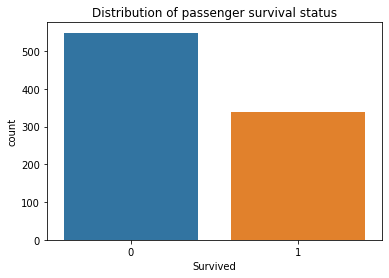

In [16]:
# Primero visualicemos la distribución de nuestra variable objetivo.

sns.countplot(x=train_data['Survived'])
plt.title('Distribution of passenger survival status')
plt.show()

In [10]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Observaciones: Como se supone que nuestra variable objetivo clasifica a los pasajeros en 1 o 0, ya sea que sobrevivan o no, usamos un gráfico de conteo para ver si los datos están equilibrados. También usamos el método value_counts() para ver exactamente cuántas personas sobrevivieron (1) y cuántas no sobrevivieron (0) en nuestro train_data. Está equilibrado y sabemos a ciencia cierta que el hundimiento del Titanic resultó en la muerte de la mayoría de sus pasajeros.

**Uso de histogramas para visualizar todas las características**

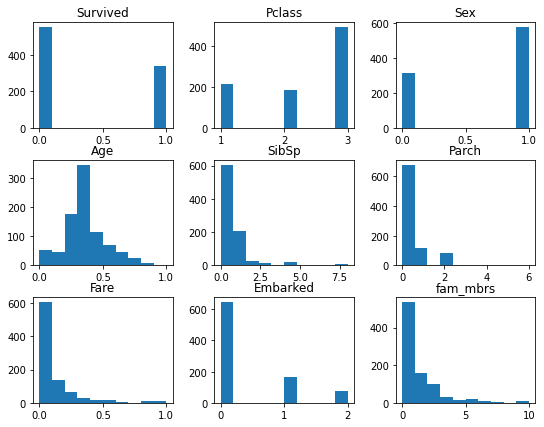

In [17]:
train_data.hist(bins=10,figsize=(9,7),grid=False);

**Countplot para variables categóricas**

In [7]:
# Revisemos las categorías en cada una de nuestras características de tipo de objeto

def countplot_features(feature):
    plot=sns.countplot(x=feature,data=train_data)
    plt.show()

def countplot_targetvsfeature(feature,y):
    fig = plt.figure(figsize=(15,10))
    plot=sns.countplot(x=feature,data=train_data,hue=y)
    plt.show()    

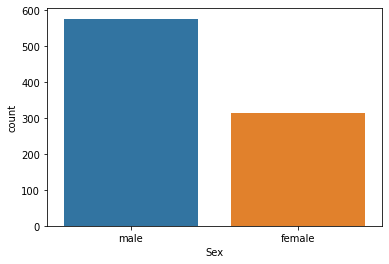

In [12]:
countplot_features('Sex')

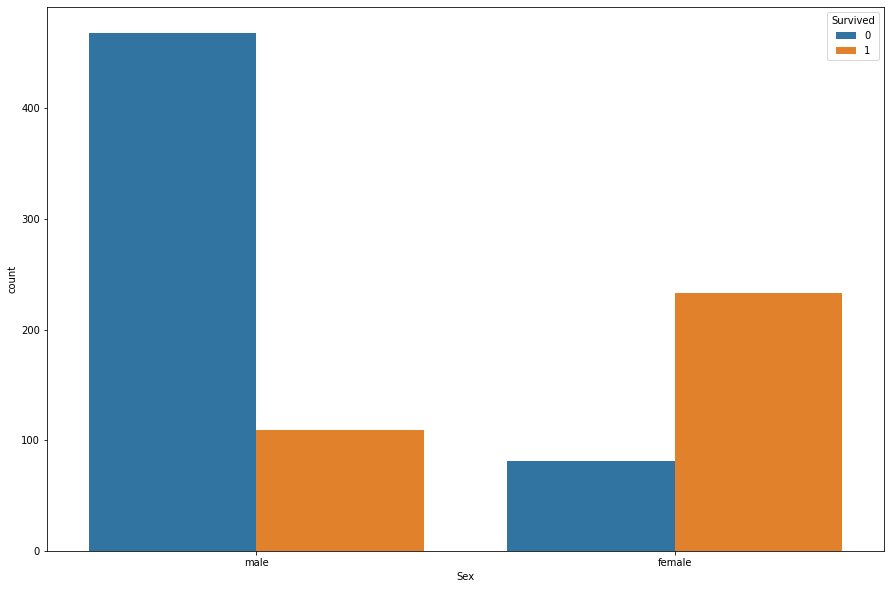

In [14]:
countplot_targetvsfeature('Sex','Survived')

Observaciones:

La mayoría de nuestros pasajeros de datos eran hombres, pero de los hombres, la mayoría de ellos no sobrevivieron. Por otro lado, aunque había menos pasajeras, la mayoría sobrevivió.

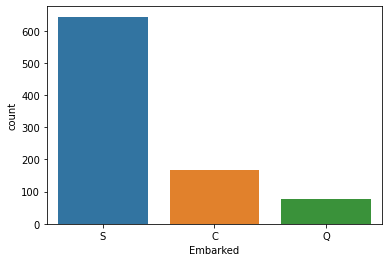

In [13]:
countplot_features('Embarked')

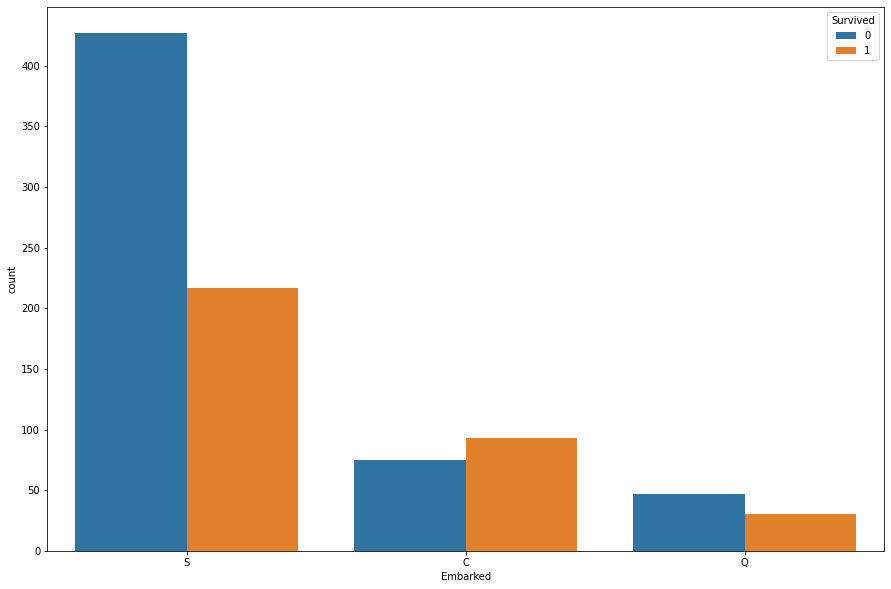

In [8]:
countplot_targetvsfeature('Embarked','Survived')

Observaciones:

La mayoría de nuestros pasajeros del Titanic embarcaron en la estación de Southampton.

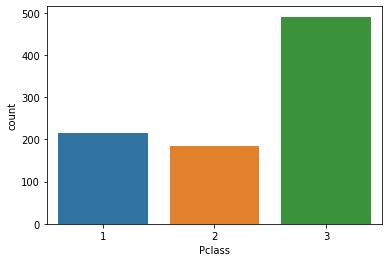

In [14]:
countplot_features('Pclass')

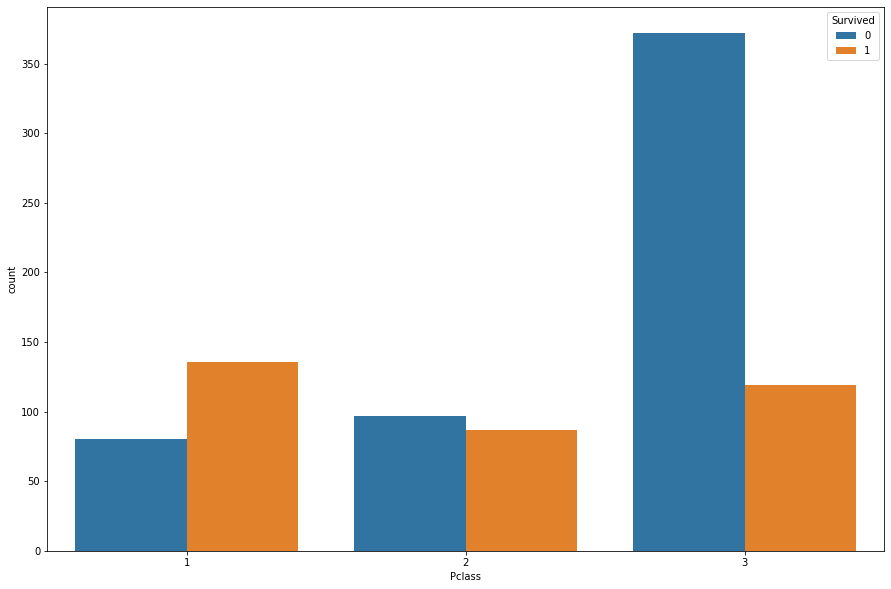

In [9]:
countplot_targetvsfeature('Pclass','Survived')

Observaciones: La mayoría de los pasajeros viajaban en tercera clase, pero la mayoría no sobrevivió. Sin embargo, en la primera clase, la mayoría de los pasajeros sobrevivieron.

**Gráficos de distribución para variables continuas**

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

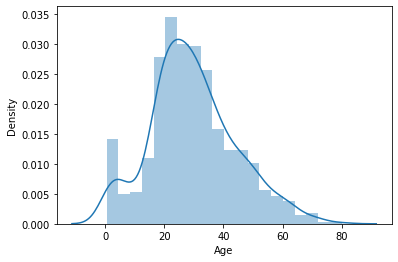

In [4]:
# Grafiquemos la función de densidad de probabilidad (PDF) de la edad de 891 pasajeros que viajan en el Titanic

sns.distplot(train_data['Age'])

(0.0, 1.05)

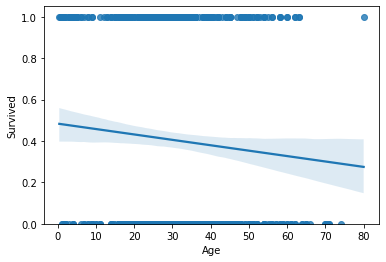

In [16]:
# Ver si existe una relación lineal entre la variable numérica continua Edad y la variable objetivo Survided

sns.regplot(x = "Age", y = "Survived", data = train_data)
plt.ylim(0,)

Observaciones:

Existe una clara relación lineal negativa entre la Edad y nuestra variable objetivo. Esto tiene sentido considerando que los niños eran uno de los grupos que tenían preferencia en usar los botes para sobrevivir (Sobrevivir = 1).

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

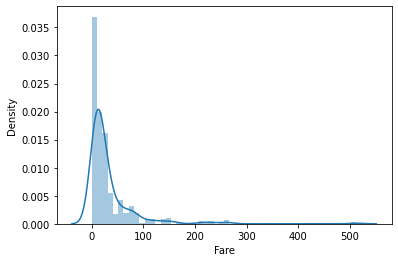

In [8]:
# Tracemos la función de densidad de probabilidad (PDF) de la tarifa pagada por 891 pasajeros que viajan en el Titanic
sns.distplot(train_data['Fare'])

Observaciones: A partir del PDF de tarifa trazado anteriormente, podemos ver que la mayoría de los puntos en la distribución se encuentran entre 0 y 100.

(0.0, 2.1616921754597285)

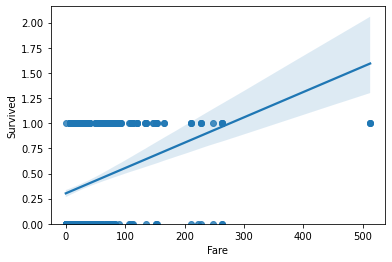

In [3]:
# Ver si existe una relación lineal entre la variable numérica continua 'Fare' (tarifa) y la variable objetivo 'Survided'

sns.regplot(x = "Fare", y = "Survived", data = train_data)
plt.ylim(0,)

Observaciones:

Sí, existe una relación lineal positiva entre la función 'Fare' y 'Survived', lo que significa que las personas que pagaron una tarifa más cara tenían más probabilidades de sobrevivir (Sobrevivir = 1).

### Eliminando datos duplicados

Los duplicados son entradas que representan el mismo punto de muestra varias veces. Por ejemplo, si una medida o registro fue registrado dos veces por dos personas diferentes. Detectar tales duplicados no siempre es fácil, ya que cada conjunto de datos puede tener un identificador único (por ejemplo, un número de índice o una identificación que es única para cada muestra nueva). Si aún no estamos seguros de cuál es la columna que identifica cada muestra única, es posible que deseemos ignorarlos primero. Y una vez que conocemos la cantidad de duplicados en nuestro conjunto de datos, simplemente podemos eliminarlos con drop_duplicates().

En el caso de nuestro conjunto de datos, no es difícil encontrar esa columna de identificador único porque su nombre de columna es muy claro: PassengerId.

In [3]:
train_duplicates = train_data['PassengerId'].duplicated().sum()

print(f'It seems that there are {train_duplicates} duplicated passenger according to the PassengerId feature')

It seems that there are 0 duplicated passenger according to the PassengerId feature


In [4]:
test_duplicates = test_data['PassengerId'].duplicated().sum()

print(f'It seems that there are {test_duplicates} duplicated passenger according to the PassengerId feature')

It seems that there are 0 duplicated passenger according to the PassengerId feature


### Eliminando datos irrelevantes

Las siguientes columnas no serán útiles para la predicción, por lo que las eliminaremos, en los conjuntos de datos de entrenamiento y prueba.

In [5]:
# Eliminar columnas irrelevantes en los datos de entrenamiento

drop_cols = ['PassengerId','Cabin', 'Ticket', 'Name']
train_data.drop(drop_cols, axis = 1, inplace = True)

In [12]:
# Suelta las mismas columnas irrelevantes en los datos de prueba

test_data.drop(drop_cols, axis = 1, inplace = True)

**Pandas drop_duplicates() Sintaxis de la función:**

DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)

**Pandas drop_duplicates () Parámetros de la función:**

Subset: el subconjunto toma una columna o lista de etiquetas de columna para identificar filas duplicadas. De forma predeterminada, todas las columnas se utilizan para encontrar las filas duplicadas.

Keep: los valores permitidos son {'primero', 'último', Falso}, predeterminado 'primero'. Si es 'primero', se eliminan las filas duplicadas excepto la primera. Si es 'último', filas duplicadas excepto que se elimina la última. Si es Falso, se eliminan todas las filas duplicadas.

Inplace: si es Verdadero, se cambia el DataFrame de origen. De forma predeterminada, el DataFrame de origen permanece sin cambios y se devuelve una nueva instancia de DataFrame.

### Trazado de diferentes características entre sí usando mapas de calor

Las correlaciones entre variables se pueden encontrar usando la función pandas “.corr()” y visualizarse con una matriz usando un mapa de calor en seaborn.

El siguiente mapa de calor muestra algunas correlaciones fuertes y débiles entre las variables. Los tonos oscuros representan una correlación negativa, mientras que los tonos más claros representan una correlación positiva.

<AxesSubplot:>

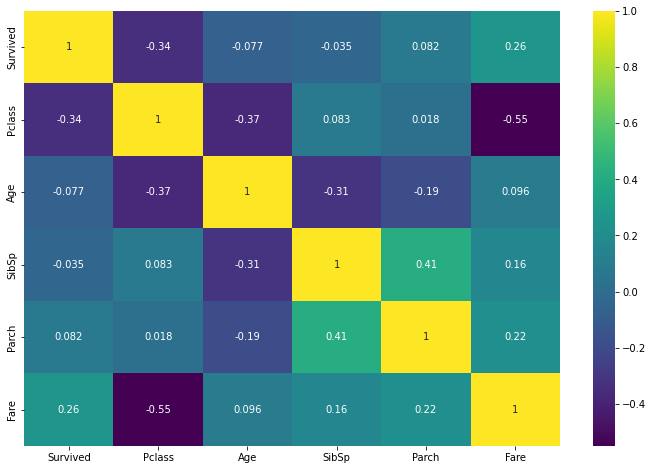

In [8]:
# Trazando un mapa de calor para encontrar relaciones entre características

plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis')

Observaciones:

Aquí se puede inferir que existe una fuerte relación negativa entre Fare y PClass. Esto es totalmente comprensible porque si un pasajero en lugar de comprar un boleto en 1ra clase (PClass = 1), decidiera comprar un boleto en 3ra clase (PClass = 3), la tarifa del boleto ciertamente disminuiría.

También existe una relación negativa entre la clase de pasajero (pclass) y la edad del pasajero. Eso significa que la 3ra clase (Pclase = 3) tenía pasajeros más jóvenes que la 1ra clase (Pclase = 1).

Además, podemos ver que Pclass está muy relacionado con la variable de destino 'Survived'. Así que a mejor clase de pasajeros, más probabilidades de sobrevivir. Podemos confirmar esta relación con el siguiente gráfico.

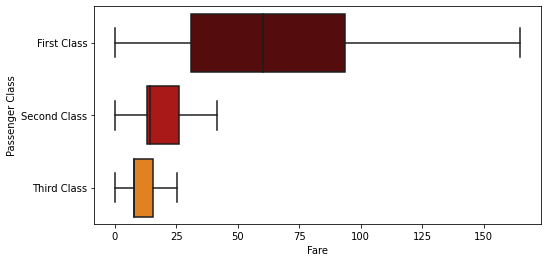

In [9]:
# Comprobando la correlación entre Pclass y Fare

plt.figure(figsize = (8, 4))
sns.boxplot(y = train_data.Pclass, x = train_data.Fare, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Passenger Class')
plt.yticks([0,1,2], ['First Class','Second Class', 'Third Class'])
plt.show()

> El parámetro showfliers = False ignora los valores atípicos. Pero si no establecemos ese parámetro, podemos usar diagramas de caja para ver los valores atípicos.

Hay diferentes formas de visualizar las relaciones:

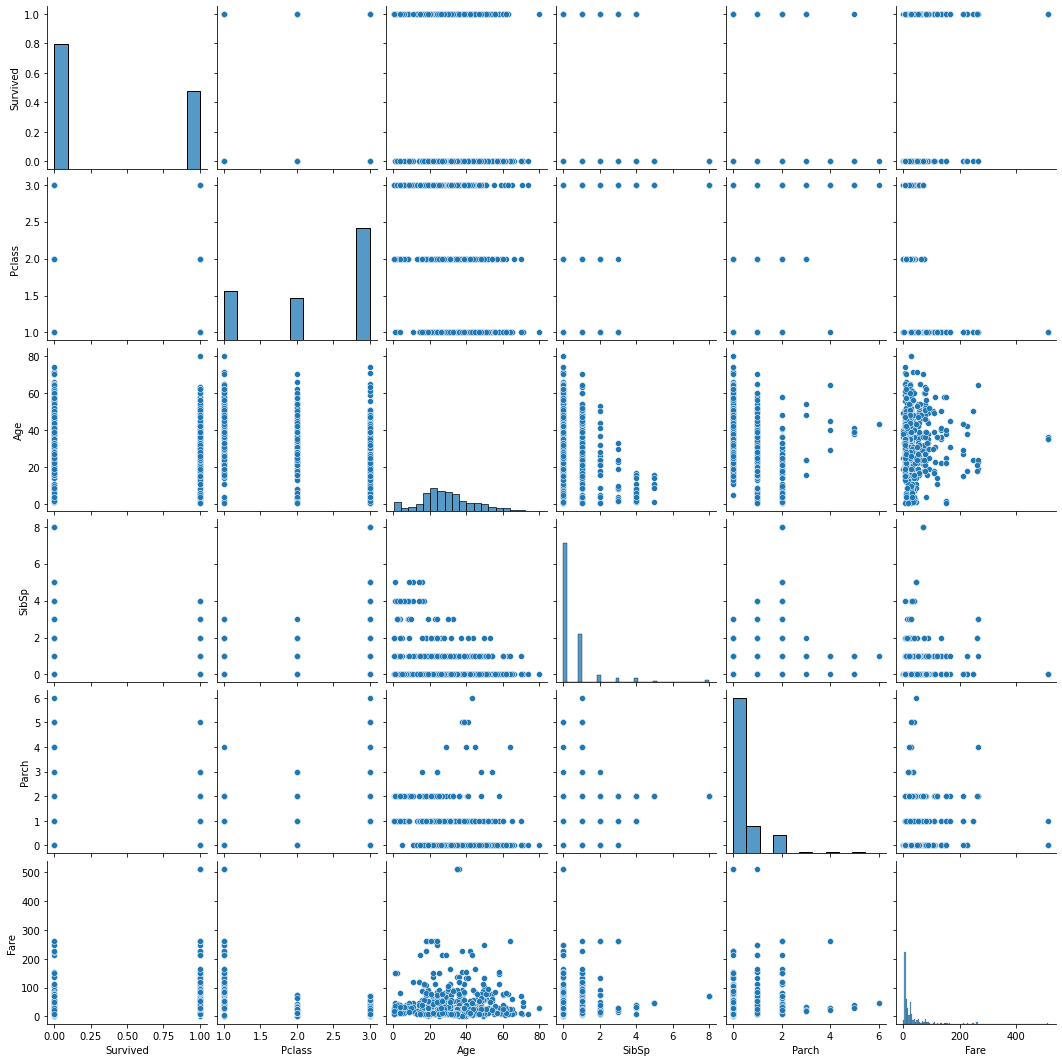

In [10]:
# Uso de seaborn.pairplot para una visualización de cuadrícula de cada relación

sns.pairplot(data=train_data)

In [20]:
# Correlación de características con el objetivo

train_data.corr()["Survived"]

Survived    1.000000
Pclass     -0.334068
Sex        -0.545899
Age        -0.067081
SibSp      -0.033395
Parch       0.082157
Fare        0.261742
Embarked    0.102964
fam_mbrs    0.018211
Name: Survived, dtype: float64

In [11]:
# Usando la transposición

train_data_corr = train_data.corr().transpose()
train_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


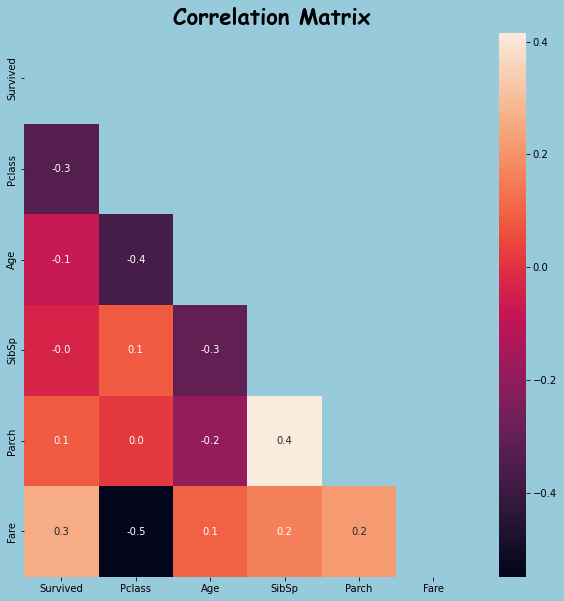

In [12]:
# Usando una forma diferente de matriz de correlación

background_color = "#97CADB"

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

# train_data_corr = train_data[['Age', 'Fare', 'SibSp', 'Parch', 'Pclass','Survived']].corr().transpose()

mask = np.triu(np.ones_like(train_data_corr))
ax0.text(2,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='cursive', color="#000000")
sns.heatmap(train_data_corr,mask=mask,fmt=".1f",annot=True)
plt.show()

**¡Fin del día 1!**

Ahora, ¡hagamos muchos análisis exploratorios de datos en el proyecto de este módulo!

# DÍA 2: INGENIERÍA DE CARACTERÍSTICAS

Para leer sobre qué son exactamente las características y por qué deberíamos hacer ingeniería de características, haz clic en el siguiente enlace: https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-3d-data/feature-engineering.ipynb

El primer proceso que aprenderemos en nuestra ingeniería de características del Titanic será cómo encontrar y manejar valores extremos (valores atípicos).

### VALORES ATÍPICOS

**ENCONTRAR VALORES ATÍPICOS**

En estadística, un valor atípico es un punto de observación que está distante de otras observaciones. En datos, significa que nuestra función de DataFrame tiene algunos valores extremos que debemos analizar más a fondo. Esos valores extremos pueden ser errores de tipeo, o pueden ser valores extremos pero considerados normales en la población que estamos estudiando. En el caso de que nuestros valores atípicos sean errores tipográficos, debemos decidir si los eliminaremos o los reemplazaremos con otro valor. En el caso de que los valores atípicos de una característica se consideren normales y parte de la población, puede ser mejor si los mantenemos porque le darán información importante a nuestro modelo.

La importancia que consideremos la característica para nuestro modelo influirá en nuestra decisión sobre qué hacer con los valores atípicos.

El método describe() de Pandas se usa para ver algunos detalles estadísticos básicos como percentil, media, std, etc; de un marco de datos o una serie de valores numéricos.En el caso de que nos gustaría ver las características del tipo de objeto usando describe(), este debe ingresarse como 'dataframe.describe(include='O')' y nos mostrará el valor más frecuente y cuántas veces aparece.

**Sintaxis:**

DataFrame.describe(percentiles=None, include=None, exclude=None)

**Parámetros:**

Percentil: lista como tipo de datos de números entre 0-1 para devolver el percentil respectivo.

Incluir: lista de tipos de datos que se incluirán al describir el DataFrame. El valor predeterminado es 'None' (ninguno).

Excluir: lista de tipos de datos que se excluirán al describir DataFrame. El valor predeterminado es 'None' (ninguno).

Tipo de retorno: resumen estadístico del DataFrame.

In [15]:
# Usemos el método de descripción para ver las estadísticas de nuestras características numéricas

train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos ver que los 891 registros contienen datos en todas y cada una de las columnas que quedan.

In [18]:
# Ahora, modifiquemos sus parámetros para poder ver algunas estadísticas sobre nuestras características categóricas.

train_data.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


**¿POR QUÉ ES ESTO ÚTIL PARA ENCONTRAR VALORES ATÍPICOS?**

En las características numéricas, podemos ver el valor mínimo y máximo de una característica específica y compararlo con su percentil 25% y 75%. También podemos comparar la media con el percentil 50% y confirmar si hay algún valor extremo alto o bajo que hace que mi media suba o baje, mucho más que el percentil 50%.

Una vez que sospechamos que hay valores atípicos, podemos usar un gráfico de caja para esa característica y así tener una mejor visualización de los valores atípicos.

Observaciones: según nuestro DataFrame de estadísticas, todo parece normal excepto la columna 'Fare' que tiene una media de 32,20 pero su percentil del 50 % es 14 y su valor máximo es 512. Podríamos decir que 512 parece ser un valor atípico, pero podría ser un error de tipeo. También es posible que el billete más caro tuviera ese precio. Sería útil si investigamos un poco y confirmamos esa información.

Veamos cómo escribir el código de un diagrama de caja para visualizar los valores atípicos.

Un diagrama de caja muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables. La caja muestra los cuartiles del conjunto de datos mientras que los bigotes se extienden para mostrar el resto de la distribución.

Text(0, 0.5, 'Fare')

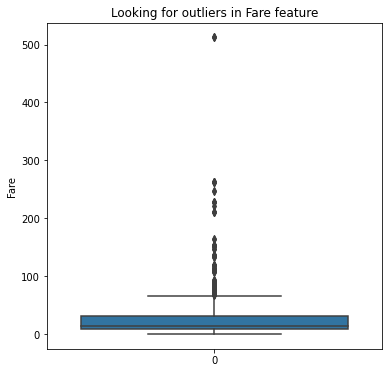

In [19]:
# Evaluemos nuestra variable 'Fare'

plt.figure(figsize=(6,6))
sns.boxplot(data=train_data['Fare'])
plt.title('Looking for outliers in Fare feature')
plt.ylabel('Fare')

Observaciones:

- Parece que la tarifa del billete 512 no es muy común. Deberíamos establecer algunos límites superior e inferior para determinar si un punto de datos debe considerarse o no un valor atípico. Hay un par de formas de determinar esto y aprenderemos sobre ellas en el proceso de limpieza de datos, sobre cómo lidiar con los valores atípicos.

**CÓMO LIDIAR CON VALORES ATÍPICOS**

Para conocer los tipos de valores atípicos y los diferentes métodos para tratarlos, lee la información del siguiente enlace:

https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-3d-data/how-to-deal-with-outliers.ipynb


Aplicaremos uno de esos métodos definiendo límites superior e inferior. Veamos cómo se implementa:

In [21]:
fare_stat = train_data['Fare'].describe()
print(fare_stat)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [22]:
IQR = fare_stat['75%']-fare_stat['25%']
upper = fare_stat['75%'] + 1.5*IQR
lower = fare_stat['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 65.6344 and -26.724.


Basándonos en estos resultados, deberíamos reducir los valores de Tarifa por encima de 65. Sin embargo, nuestro criterio es muy importante aquí y, según los precios que vimos en el diagrama de caja, los valores más extremos están por encima de 300. Veamos cuántos valores representan ese valor extremo de 512 y déjalos caer. 

In [23]:
# Visualizando los datos con tarifa superior a 300

train_data[train_data['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


Observaciones: Los tres individuos que pagaron una tarifa de '512.3292' sobrevivieron. ¿Deberíamos dejarlos? ¿O pueden aportar información valiosa a nuestro modelo?

Aprenderemos a soltar filas con valores mayores que cierto valor. Pero puede investigar más sobre las tarifas del Titanic y decidir si las mantiene o no.

In [6]:
# Bajar datos con tarifa superior a 300

train_data.drop(train_data[(train_data['Fare'] > 300)].index, inplace=True)

In [14]:
# Confirmar que hay tres filas menos

train_data.shape

(888, 8)

¡Confirmamos que hemos eliminado esos 3 valores atípicos!

### ¡Confirmamos que hemos eliminado esos 3 valores atípicos!

**ENCONTRANDO VALORES FALTANTES O NULOS**

La mayoría de los algoritmos de Machine Learning no pueden manejar los valores faltantes. Tener algunos valores faltantes es normal y deberíamos decidir si eliminarlos o reemplazarlos con otros valores. Lo que queremos identificar en esta etapa son grandes agujeros en el conjunto de datos con características que tienen muchos valores faltantes.

Comenzamos separando nuestras características en columnas numéricas y categóricas. Hacemos esto porque el método para manejar los valores faltantes, más adelante, será diferente para estos dos tipos de datos.

In [15]:
# Separar variables numéricas y categóricas

num_vars = train_data.columns[train_data.dtypes != 'object']
cat_vars = train_data.columns[train_data.dtypes == 'object']

print("Numerical variables:", num_vars)
print("Categorical variables:", cat_vars)

Numerical variables: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical variables: Index(['Sex', 'Embarked'], dtype='object')


Usaremos la función pandas "isnull ()" para encontrar todos los campos que tienen valores faltantes. Esto devolverá True si un campo tiene valores faltantes y false si el campo no tiene valores faltantes. 

Para saber cuántos valores faltantes hay en cada columna, usamos sum() junto con isnull(). Esto resumirá todos los Verdaderos en cada columna.

In [12]:
train_data[num_vars].isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [13]:
train_data[cat_vars].isnull().sum()

Sex         0
Embarked    2
dtype: int64

Ahora, sort_values() ordenará los valores faltantes en orden ascendente. Siempre es una buena práctica ordenarlos en orden descendente para que podamos ver primero las columnas que tienen el mayor número de valores faltantes.

In [29]:
train_data[num_vars].isnull().sum().sort_values(ascending=False)

Age         177
Survived      0
Pclass        0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [30]:
train_data[cat_vars].isnull().sum().sort_values(ascending=False)

Embarked    2
Sex         0
dtype: int64

Finalmente, podemos dividir ese resultado por la longitud de nuestro DataFrame (el número de filas) para obtener el porcentaje de valores faltantes en cada columna. Los valores faltantes generalmente se representan en forma de Nan, Null (nulo) o None (ninguno) en el conjunto de datos.

In [31]:
train_data[num_vars].isnull().sum().sort_values(ascending=False)/len(train_data)

Age         0.199324
Survived    0.000000
Pclass      0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
dtype: float64

In [32]:
train_data[cat_vars].isnull().sum().sort_values(ascending=False)/len(train_data)

Embarked    0.002252
Sex         0.000000
dtype: float64

In [16]:
# ¿Con cuántos valores nulos debo tratar en los datos de prueba?

test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

**CÓMO TRATAR CON VALORES FALTANTES**
 
Para conocer las técnicas sobre cómo lidiar con los valores faltantes, lee la información del siguiente enlace:

https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-3d-data/how-to-deal-with-missing-values.ipynb

In [7]:
# Manejo de Vlores Faltantes en train_data

## Rellenar la EDAD que falta con la Mediana
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

## Rellenar el faltante EMBARQUE con el Modo
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

La notación '[0]' significa que lo que está delante (modo() en este caso) es una colección, una lista, un arreglo... y estás tomando el primer elemento.

El modo () devuelve 2 valores, el primero es el valor del modo, el segundo es el recuento. Entonces 'train_data['Embarked'].mode()[0]' significa que obtenemos el valor de modo de 'train_data['Embarked']'.

Verifiquemos que no queden valores faltantes:

In [16]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Ahora también manejemos los valores que faltan en nuestros datos de prueba:

In [8]:
# Manejo de Valores Perdidos en datos de prueba

## Rellenar la AGE y la FARE que faltan con la Mediana

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [18]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Crear nuevas funciones a partir de las disponibles en nuestro conjunto de datos

Como parte de la ingeniería de funciones y antes de codificar nuestras variables de etiqueta, aprenderemos cómo crear nuevas funciones basadas en las existentes. Veamos cómo está nuestro conjunto de datos hasta ahora al observar las primeras 10 filas.

In [ ]:
train_data.head(10)

In [9]:
# Crearemos una nueva columna para mostrar cuántos miembros de la familia de cada pasajero había en el Titanic
# Lo calcularemos en base a la suma de SibSp (hermanos y cónyuge) y Parch (padres e hijos)

print(train_data)

train_data["fam_mbrs"] = train_data["SibSp"] + train_data["Parch"]

print(train_data)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  28.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[888 rows x 8 columns]
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  fam_mbrs
0           0       3    male  22.0      1      0   7.2500        S         1
1   

In [19]:
test_data["fam_mbrs"] = test_data["SibSp"] + test_data["Parch"]

### CODIFICACIÓN DE CARACTERÍSTICAS PARA VARIABLES CATEGÓRICAS

La codificación de características es el proceso de convertir datos categóricos en un conjunto de datos en datos numéricos. Es esencial que realicemos la codificación de funciones porque la mayoría de los modelos de Machine Learning solo pueden interpretar datos numéricos y no datos en forma de texto.

Para leer sobre los diferentes métodos de codificación de funciones, ve al siguiente enlace: https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-3d-data/feature-encoding-for-categorical-variables.ipynb

Para agregar información adicional, aquí usaremos un método corto y diferente sobre cómo aplicar números específicos directamente a nuestras funciones de etiqueta, por lo que estamos codificando manualmente nuestras funciones categóricas, pero puede usar Scikit learn o Pandas.

In [10]:
# Datos de entrenamiento

# Codificando la columna 'Sex'
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Codificando la columna 'Embarked' 
train_data['Embarked'] = train_data['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [11]:
# Datos de prueba

# Codificando la columna 'Sex'
test_data['Sex'] = test_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Codificando la columna 'Embarked' 
test_data['Embarked'] = test_data['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [23]:
# Verificando que todas nuestras características ahora son números

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_mbrs
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,0


### ESCALADO DE CARACTERÍSTICAS

Entonces, ahora que tenemos todas nuestras funciones convertidas en números, ¿están listas para el modelado? Depende si todas nuestras características están en la misma escala o no. Para leer qué significa tener diferentes escalas y los métodos para estandarizarlas, ve al siguiente enlace: https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-3d-data/feature-scaling.ipynb

Después de leerlo, decidimos implementar StandardScaler, pero puede encontrar razones para escalar su marco de datos de una manera diferente.

In [12]:
# Módulo de importación

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaler = scaler.fit(train_data[['Age', 'Fare']])
train_data[['Age', 'Fare']] = train_scaler.transform(train_data[['Age', 'Fare']])

test_scaler = scaler.fit(test_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = test_scaler.transform(test_data[['Age', 'Fare']])

In [13]:
# Verificando

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_mbrs
0,0,3,1,0.271174,1,0,0.027567,0,1
1,1,1,0,0.472229,1,0,0.271039,1,1
2,1,3,0,0.321438,0,0,0.030133,0,0
3,1,1,0,0.434531,1,0,0.201901,0,1
4,0,3,1,0.434531,0,0,0.030608,0,0


In [29]:
# Verificando

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_mbrs
0,3,1,0.452723,0,0,0.015282,2,0
1,3,0,0.617566,1,0,0.013663,0,1
2,2,1,0.815377,0,0,0.018909,2,0
3,3,1,0.353818,0,0,0.016908,0,0
4,3,0,0.287881,1,1,0.023984,0,2


**¡Fin del día 2!**

¡Ahora vamos a limpiar nuestro conjunto de datos del proyecto y dejarlo casi listo para el modelado!

# Día 3: SELECCIÓN DE CARACTERÍSTICAS

Ir al siguiente enlace https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-3d-data/feature-selection.ipynb para leer la información sobre cuándo es necesario realizar una selección de características y cuáles son los métodos existentes para hacerlo.

¿Cómo recuperar las 5 características informativas correctas en el conjunto de datos del Titanic?

In [24]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_mbrs
0,0,3,1,-0.563437,1,0,-0.566959,0,1
1,1,1,0,0.664528,1,0,0.989016,1,1
2,1,3,0,-0.256446,0,0,-0.550557,0,0
3,1,1,0,0.434285,1,0,0.547171,0,1
4,0,3,1,0.434285,0,0,-0.547519,0,0


In [14]:
# Separar características del objetivo

X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

mdlsel = SelectKBest(chi2, k=5) 
mdlsel.fit(X,y)
ix = mdlsel.get_support() 
data2 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix])

data2.head(n=5)

,Pclass,Sex,Parch,Fare,Embarked
0,3.0,1.0,0.0,0.027567,0.0
1,1.0,0.0,0.0,0.271039,1.0
2,3.0,0.0,0.0,0.030133,0.0
3,1.0,0.0,0.0,0.201901,0.0
4,3.0,1.0,0.0,0.030608,0.0


En este caso, utilizando la selección de características de Chi cuadrado, las características más importantes son 'Pclass', 'Sex', 'Parch', 'Fare' y 'Embarked'.

Esto es solo para mostrarte cómo aplicar uno de los métodos de selección de características en el conjunto de datos de Titanic para reducir la cantidad de características antes del modelado; sin embargo, Titanic es un conjunto de datos corto, por lo que debes evaluar si realizar la selección de características o no.

Hay algoritmos que incluyen la selección de características en su proceso de modelado (por ejemplo, el modelado de Lasso).

Este proceso está muy relacionado con el proceso de modelado, ya que, para comprobar si estamos haciendo una buena selección de características, a veces es necesario hacer algún modelado con diferentes grupos de características para conocer la precisión lograda.

¡Ahora adelante y analiza tu proyecto DataFrame!

Fuente:

https://www.dataquest.io/blog/pandas-python-tutorial/

https://www.kdnuggets.com/2020/07/exploratory-data-analysis-steroids.html

https://www.dataquest.io/blog/pandas-tutorial-python-2/

https://medium.com/analytics-vidhya/introduction-to-exploratory-data-analysis-for-image-text-based-data-1179e194df3f#:~:text=Exploratory%20data%20analysis%20is%20the%20first%20step%20towards,the%20closer%20you%20get%20to%20solving%20the%20problem.

https://medium.com/epfl-extension-school/advanced-exploratory-data-analysis-eda-with-python-536fa83c578a